<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

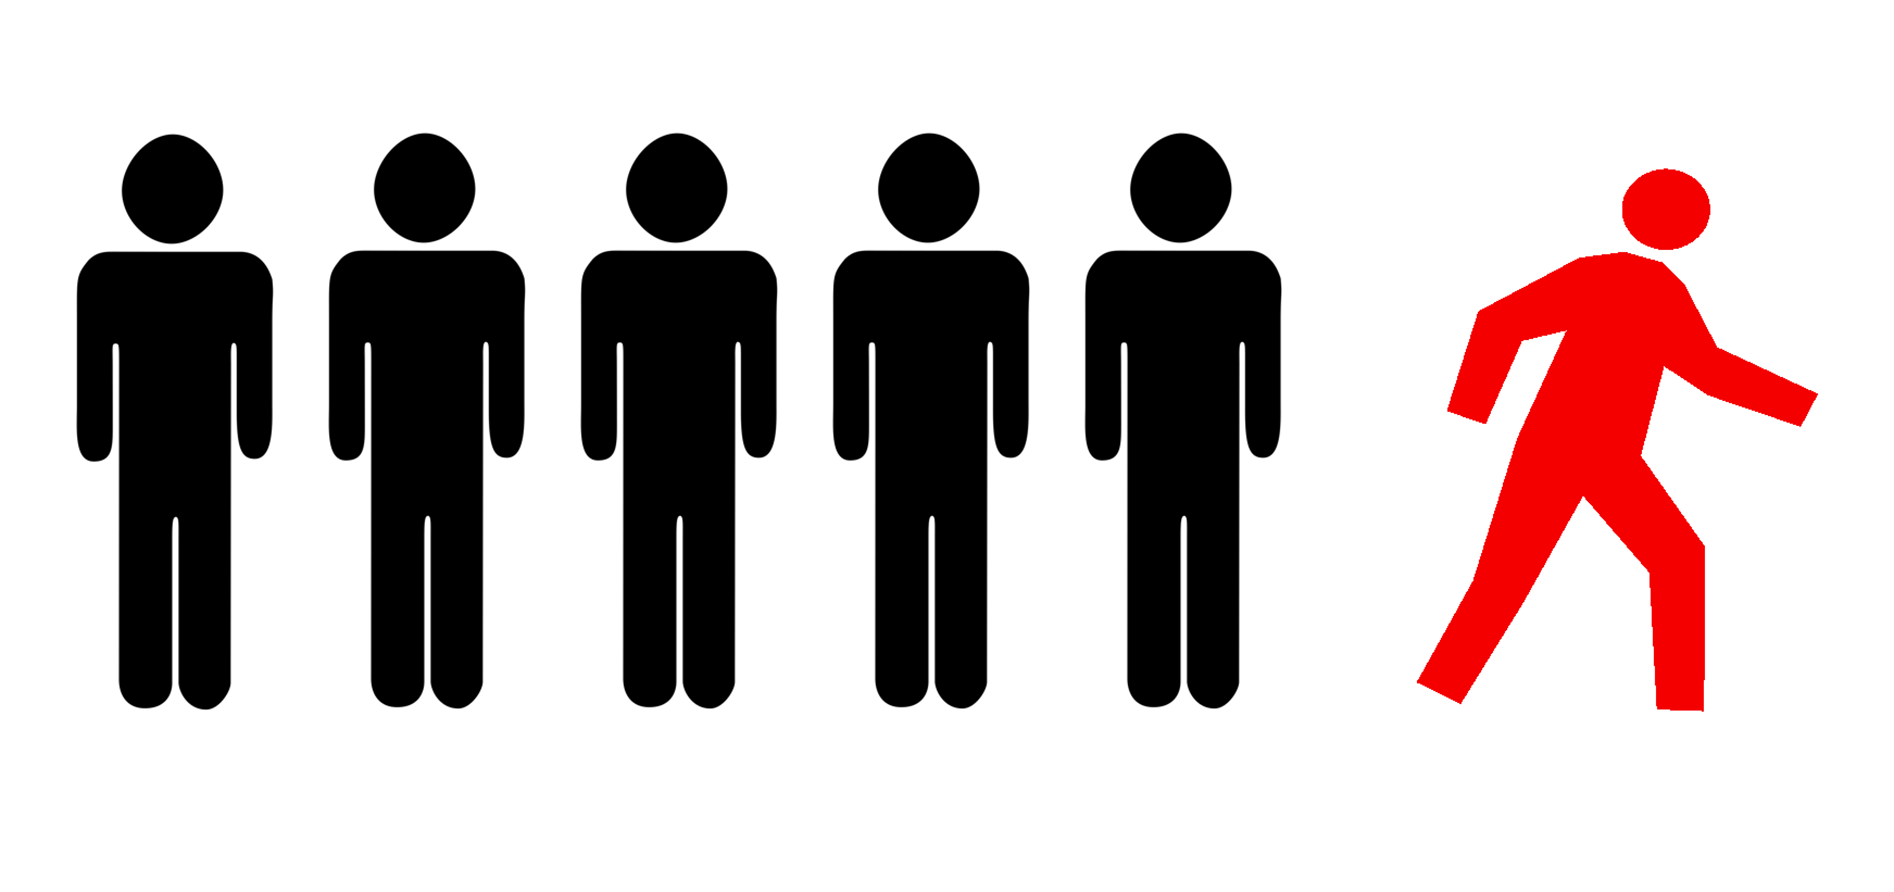

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [ ]:
df = pd.read_csv('./Churn.csv')
df.head()

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

## EDA

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## Data Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features; drop the first dummy column to avoid multicollinearity.
# Recommended for linear/logistic models; not needed for tree-based models (RF, XGBoost, etc.)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

X_train_num = X_train[num_cols].values
X_test_num  = X_test[num_cols].values

X_train_enc = np.hstack([X_train_num, X_train_cat])
X_test_enc  = np.hstack([X_test_num, X_test_cat])

In [ ]:
X_train_enc

In [ ]:
X_test_enc

In [ ]:
encoded_feature_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = list(num_cols) + list(encoded_feature_names)

X_train_enc_df = pd.DataFrame(X_train_enc, columns=all_feature_names)
X_test_enc_df  = pd.DataFrame(X_test_enc, columns=all_feature_names)

In [ ]:
X_train_enc_df

In [ ]:
X_test_enc_df

## Strorytelling - Visualization

In [ ]:
target = "Exited"

In [ ]:
churn_rate = df[target].value_counts(normalize=True) * 100

sns.barplot(
    x=churn_rate.index.map({0: "Stayed", 1: "Exited"}),
    y=churn_rate.values
)

plt.title("Overall Customer Exit Rate (%)")
plt.ylabel("Percentage")
plt.xlabel("Customer Status")
plt.show()


In [ ]:
sns.countplot(
    data=df,
    x="Gender",
    hue=target
)

plt.title("Exit by Gender")
plt.show()


In [ ]:
sns.countplot(
    data=df,
    x="Geography",
    hue=target
)

plt.title("Exit by Geography")
plt.show()


In [ ]:
sns.boxplot(
    data=df,
    x=target,
    y="Age"
)

plt.title("Age vs Exit")
plt.xlabel("Exited")
plt.show()


In [ ]:
sns.histplot(
    data=df,
    x="Tenure",
    hue=target,
    bins=10,
    multiple="stack"
)

plt.title("Tenure Distribution by Exit")
plt.show()


In [ ]:
sns.countplot(
    data=df,
    x="IsActiveMember",
    hue=target
)

plt.title("Exit by Activity Status")
plt.xlabel("Is Active Member")
plt.show()


In [ ]:
sns.countplot(
    data=df,
    x="NumOfProducts",
    hue=target
)

plt.title("Exit by Number of Products")
plt.show()


In [ ]:
sns.boxplot(
    data=df,
    x=target,
    y="Balance"
)

plt.title("Balance vs Exit")
plt.show()


In [ ]:
sns.kdeplot(
    data=df,
    x="CreditScore",
    hue=target,
    fill=True
)

plt.title("Credit Score Distribution by Exit")
plt.show()


In [ ]:
summary = (
    df.groupby("Exited")[[
        "Age",
        "Tenure",
        "Balance",
        "CreditScore",
        "EstimatedSalary"
    ]]
    .mean()
    .round(2)
)

summary


## Prepare Data for Machine learning

## Train your model

## Test the model and show the metrics

## Save your final model